In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#Remove all the rows where Customer ID is null

df.dropna(subset=['CustomerID'],inplace=True)

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#Checking rows containing negative values

df[df['Quantity']<0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
#Dropping rows with containing negative values

df.drop(df[df['Quantity']<0].index,inplace=True)

In [ ]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


<Axes: xlabel='Country'>

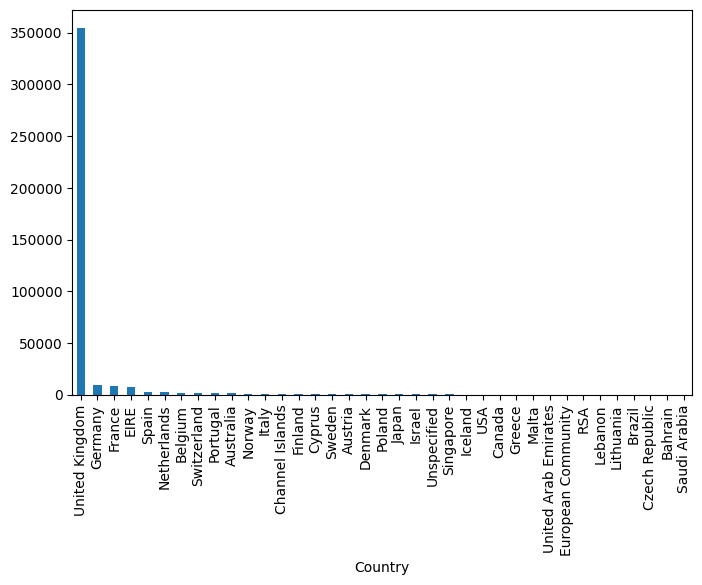

In [ ]:
df.Country.value_counts().plot.bar(figsize=(8,5))

In [ ]:
#Keeping only United Kingdom

df=df[df['Country']=='United Kingdom']

In [ ]:
#Convert Customer ID from float64 to int
df['CustomerID'] = df['CustomerID'].astype(int)

<ipython-input-17-3c362413375b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)


In [ ]:
#Total price= Quantity*Price

df['Total_Price']=df['Quantity']*df['UnitPrice']

In [ ]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
378487,569651,85014B,RED RETROSPOT UMBRELLA,1,2011-10-05 12:49:00,5.95,14534,United Kingdom,5.95
16310,537646,22192,BLUE DINER WALL CLOCK,1,2010-12-07 15:39:00,8.50,17591,United Kingdom,8.50
506889,579161,22161,HEART DECORATION RUSTIC HANGING,5,2011-11-28 13:56:00,0.19,17379,United Kingdom,0.95
465781,576255,22163,HEART STRING MEMO HOLDER HANGING,1,2011-11-14 14:09:00,0.79,15993,United Kingdom,0.79
438623,574328,22986,WRAP GINGHAM ROSE,25,2011-11-04 09:05:00,0.42,13081,United Kingdom,10.50


#RFM Analysis

In [ ]:
df1= df.drop(['InvoiceNo','StockCode','Country','Description','UnitPrice','Quantity'],axis=1,inplace=True)

In [ ]:
#Convert df1 to DataFrame
df1=pd.DataFrame(df)

In [ ]:
df1.head()

,InvoiceDate,CustomerID,Total_Price
0,2010-12-01 08:26:00,17850,15.30
1,2010-12-01 08:26:00,17850,20.34
2,2010-12-01 08:26:00,17850,22.00
3,2010-12-01 08:26:00,17850,20.34
4,2010-12-01 08:26:00,17850,20.34


In [ ]:
# Set the reference date as the latest transaction date
reference_date = df1['InvoiceDate'].max()

In [ ]:
# Calculate Recency, Frequency, and Monetary values for each customer
rfm_data = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (reference_date - x.max()).days,'Total_Price': 'mean'}).reset_index()

# Rename columns for clarity
rfm_data.rename(columns={'InvoiceDate': 'Recency','Total_Price': 'MonetaryValue'}, inplace=True)

# Calculate Frequency separately
frequency_data = df1.groupby('CustomerID')['CustomerID'].count().reset_index(name='Frequency')

# Merge frequency data into RFM data
# Use 'customer_id' explicitly for both DataFrames
rfm_data = rfm_data.merge(frequency_data, left_on='CustomerID', right_on='CustomerID', how='left')

In [ ]:
rfm_data.head()

,CustomerID,Recency,MonetaryValue,Frequency
0,12346,325,77183.600000,1
1,12747,1,40.737961,103
2,12748,0,7.336756,4596
3,12749,3,20.557186,199
4,12820,2,15.971864,59


In [ ]:
# Perform RFM scoring
def rfm_scoring(rfm_data):
    # Recency score
    rfm_data['R'] = rfm_data['Recency'].apply(lambda x: 1 if x > 730 else (2 if x > 365 else 3))

    # Frequency score
    rfm_data['F'] = rfm_data['Frequency'].apply(lambda x: 1 if x == 1 else (2 if x <= 3 else 3))

    # Monetary score
    rfm_data['M'] = rfm_data['MonetaryValue'].apply(lambda x: 1 if x <= 20 else (2 if x <= 50 else 3))

    return rfm_data

In [ ]:
# Apply the scoring function
rfm_data = rfm_scoring(rfm_data)

In [ ]:
rfm_data.sample(5)

,CustomerID,Recency,MonetaryValue,Frequency,R,F,M
1585,15067,77,21.277561,82,3,3,2
3133,17189,105,6.301639,61,3,3,1
1566,15045,151,61.305000,12,3,3,3
512,13529,78,20.517333,15,3,3,2
243,13157,48,20.014023,87,3,3,2


##Silhouette score to determine number of clusters

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Select the features for clustering
features = rfm_data[['Recency', 'MonetaryValue', 'Frequency', 'R', 'F', 'M']]

In [ ]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

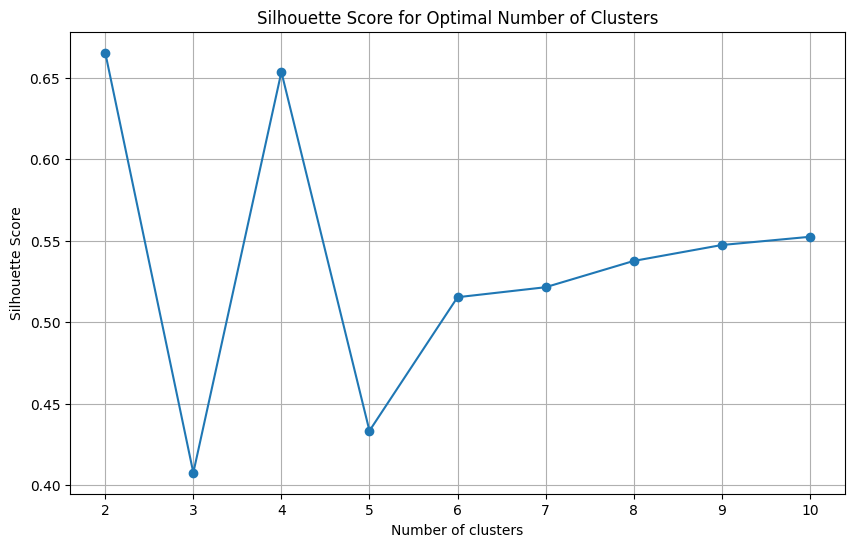

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):  # Starting from 2 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_features, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
silhouette_scores

[0.6653842190177321,
 0.407614528245183,
 0.6535732726674431,
 0.43332974168698457,
 0.5153287357219745,
 0.5214686719759628,
 0.5375859896518111,
 0.547365302473915,
 0.5524073041526523]

##Applying K-Means Clustering

In [ ]:
# Apply K-Means clustering

kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_data[['R', 'F', 'M']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
rfm_data

,CustomerID,Recency,MonetaryValue,Frequency,R,F,M,Cluster
0,12346,325,77183.600000,1,3,1,3,0
1,12747,1,40.737961,103,3,3,2,3
2,12748,0,7.336756,4596,3,3,1,1
3,12749,3,20.557186,199,3,3,2,3
4,12820,2,15.971864,59,3,3,1,1
...,...,...,...,...,...,...,...,...
3916,18280,277,18.060000,10,3,3,1,1
3917,18281,180,11.545714,7,3,3,1,1
3918,18282,7,14.837500,12,3,3,1,1
3919,18283,3,2.771005,756,3,3,1,1


In [ ]:
feat=['R','F','M','Cluster']

In [ ]:
#Check unique values along with the column names
for col in feat:
  print(f"{col} ----> Unique values: {rfm_data[col].unique()}")

R ----> Unique values: [3 2]
F ----> Unique values: [1 3 2]
M ----> Unique values: [3 2 1]
Cluster ----> Unique values: [0 3 1 2]


In [ ]:
#cluster 1 implies r =3, f =3, m=1

#cluster 0 implies r = 3, f = 1, m = 3

#cluster 2 implies r =3, f=3, m=3

#cluster 3 implies r = 3, f=3, m=2


In [ ]:
#Convert df to csv

rfm_data.to_csv('rfm_data.csv',index=False)

##Managerial segmentation

In [ ]:
# Function to score R, F, M values
# Define function to assign R, F, and M scores based on tertiles
def assign_rfm_scores_tertiles(rfm_data):
    # Calculate tertiles
    r_labels = ['Low', 'Medium', 'High']
    f_labels = ['Low', 'Medium', 'High']
    m_labels = ['Low', 'Medium', 'High']

    # Assign R scores (higher is better, so reverse the order)
    rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 3, labels=r_labels[::-1])

    # Assign F and M scores
    rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'], 3, labels=f_labels)
    rfm_data['M_Score'] = pd.qcut(rfm_data['MonetaryValue'], 3, labels=m_labels)

    return rfm_data

In [ ]:
# Apply the function to the dataset
rfm_data_scored = assign_rfm_scores_tertiles(rfm_data)

In [ ]:
rfm_data_scored.head()

,CustomerID,Recency,MonetaryValue,Frequency,R,F,M,Cluster,R_Score,F_Score,M_Score
0,12346,325,77183.600000,1,3,1,3,0,Low,Low,High
1,12747,1,40.737961,103,3,3,2,3,High,High,High
2,12748,0,7.336756,4596,3,3,1,1,High,High,Low
3,12749,3,20.557186,199,3,3,2,3,High,High,Medium
4,12820,2,15.971864,59,3,3,1,1,High,Medium,Medium


In [ ]:
# Create RFM segment names
rfm_data_scored['RFM_Segment'] = rfm_data_scored['R_Score'].astype(str) + '-' + rfm_data_scored['F_Score'].astype(str) + '-' + rfm_data_scored['M_Score'].astype(str)


In [ ]:
# Count the number of customers in each RFM segment
segment_counts = rfm_data_scored['RFM_Segment'].value_counts().reset_index()
segment_counts.columns = ['RFM_Segment', 'Count']

In [ ]:
segment_counts

,RFM_Segment,Count
0,Low-Low-High,355
1,High-High-Low,340
2,Low-Low-Medium,254
3,High-High-Medium,217
4,Medium-Medium-Medium,201
5,Medium-Low-High,201
6,Medium-High-Low,200
7,Low-Medium-Low,187
8,High-High-High,187
9,Medium-Medium-Low,161


In [ ]:
# Define a mapping to club similar segments into larger actionable segments
segment_mapping = {
    'High-High-High': 'Champions',
    'High-High-Medium': 'Loyal Customers',
    'High-High-Low': 'Potential Loyalists',
    'High-Medium-High': 'Recent Big Spenders',
    'High-Medium-Medium': 'Recent Average Spenders',
    'High-Medium-Low': 'Recent Low Spenders',
    'High-Low-High': 'New Big Spenders',
    'High-Low-Medium': 'New Average Spenders',
    'High-Low-Low': 'New Low Spenders',
    'Medium-High-High': 'Big Spenders',
    'Medium-High-Medium': 'Frequent Shoppers',
    'Medium-High-Low': 'Frequent Low Spenders',
    'Medium-Medium-High': 'Average Shoppers',
    'Medium-Medium-Medium': 'Consistent Customers',
    'Medium-Medium-Low': 'Infrequent Low Spenders',
    'Medium-Low-High': 'Potential Big Spenders',
    'Medium-Low-Medium': 'Potential Average Spenders',
    'Medium-Low-Low': 'Potential Low Spenders',
    'Low-High-High': 'High Spending At-Risk',
    'Low-High-Medium': 'Medium Spending At-Risk',
    'Low-High-Low': 'Low Spending At-Risk',
    'Low-Medium-High': 'At-Risk Big Spenders',
    'Low-Medium-Medium': 'At-Risk Average Spenders',
    'Low-Medium-Low': 'At-Risk Low Spenders',
    'Low-Low-High': 'Lost Big Spenders',
    'Low-Low-Medium': 'Lost Average Spenders',
    'Low-Low-Low': 'Lost Low Spenders'
}

In [ ]:
# Map the RFM segments to larger actionable segments
rfm_data_scored['Actionable_Segment'] = rfm_data_scored['RFM_Segment'].map(segment_mapping)

In [ ]:
# Count the number of customers in each actionable segment
actionable_segment_counts = rfm_data_scored['Actionable_Segment'].value_counts().reset_index()
actionable_segment_counts.columns = ['Actionable_Segment', 'Count']

In [ ]:
# Display the actionable segment counts
actionable_segment_counts

,Actionable_Segment,Count
0,Lost Big Spenders,355
1,Potential Loyalists,340
2,Lost Average Spenders,254
3,Loyal Customers,217
4,Consistent Customers,201
5,Potential Big Spenders,201
6,Frequent Low Spenders,200
7,At-Risk Low Spenders,187
8,Champions,187
9,Infrequent Low Spenders,161


In [ ]:
# Identify the two most important and sizable segments
top_segments = actionable_segment_counts.head(2)
top_segments

,Actionable_Segment,Count
0,Lost Big Spenders,355
1,Potential Loyalists,340
